In [45]:
import pandas as pd

DATA_PATH = "../data/"

df_pol = pd.read_csv(DATA_PATH + "israel_political_violence.csv")
df_civ = pd.read_csv(DATA_PATH + "israel_civilian_targeting.csv")
df_demo = pd.read_csv(DATA_PATH + "israel_demonstration.csv")

df_pol.head(), df_civ.head(), df_demo.head()


(  Country     Month  Year  Events  Fatalities
 0  Israel   January  2016       5           3
 1  Israel  February  2016       4           1
 2  Israel     March  2016       6           3
 3  Israel     April  2016       4           1
 4  Israel       May  2016       8           0,
   Country     Month  Year  Events  Fatalities
 0  Israel   January  2016       1           2
 1  Israel  February  2016       2           0
 2  Israel     March  2016       3           3
 3  Israel     April  2016       3           1
 4  Israel       May  2016       5           0,
   Country     Month  Year  Events  Unnamed: 4
 0  Israel   January  2016      11         NaN
 1  Israel  February  2016      18         NaN
 2  Israel     March  2016      10         NaN
 3  Israel     April  2016       8         NaN
 4  Israel       May  2016       8         NaN)

In [48]:
def add_date_column(df):
    df["date_str"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
    df["date"] = pd.to_datetime(df["date_str"], format="%Y-%B")
    return df.sort_values("date")

df_pol = add_date_column(df_pol)
df_civ = add_date_column(df_civ)
df_demo = add_date_column(df_demo)

df_pol.head()


,Country,Month,Year,Events,Fatalities,date_str,date
0,Israel,January,2016,5,3,2016-January,2016-01-01
1,Israel,February,2016,4,1,2016-February,2016-02-01
2,Israel,March,2016,6,3,2016-March,2016-03-01
3,Israel,April,2016,4,1,2016-April,2016-04-01
4,Israel,May,2016,8,0,2016-May,2016-05-01


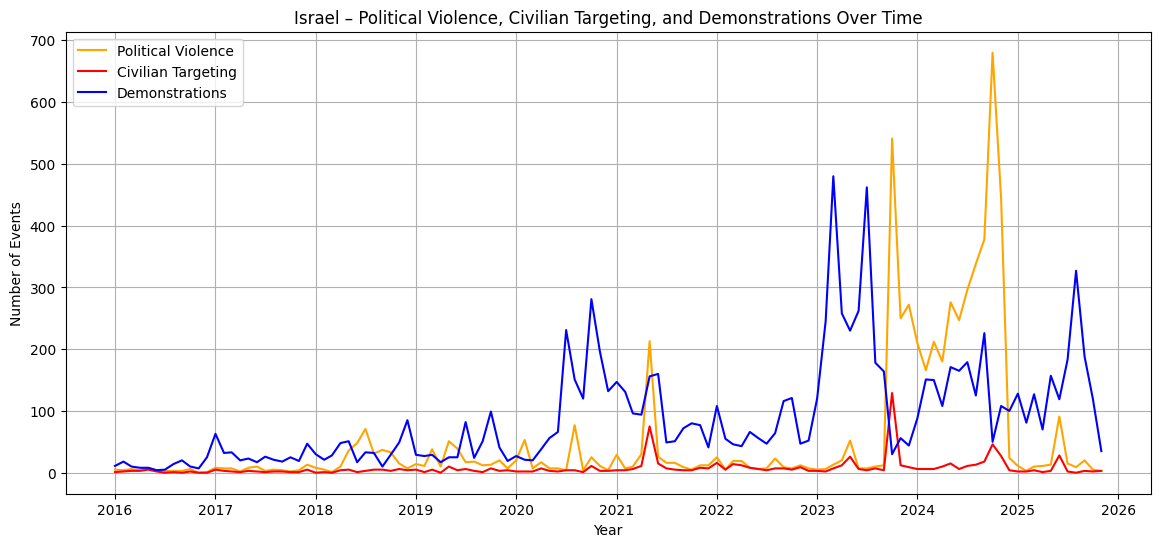

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_pol["date"], df_pol["Events"], label="Political Violence", color="orange")
plt.plot(df_civ["date"], df_civ["Events"], label="Civilian Targeting", color="red")
plt.plot(df_demo["date"], df_demo["Events"], label="Demonstrations", color="blue")
plt.title("Israel – Political Violence, Civilian Targeting, and Demonstrations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.legend()
plt.show()



## Fatalities Over Time (Israel, ACLED data)

The extreme spike in October 2023 corresponds to the Hamas attack on Israel on 7 October 2023, causing over a thousand fatalities in a single day—a dramatic outlier compared to all other months in the dataset.

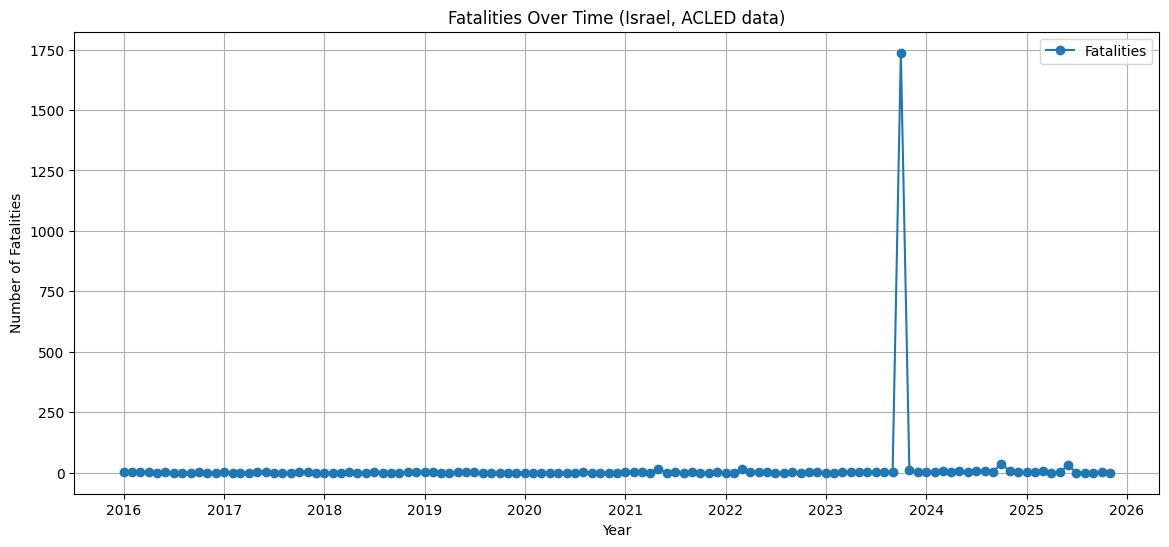

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df["date"], df["Fatalities"], marker="o", label="Fatalities")
plt.title("Fatalities Over Time (Israel, ACLED data)")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.grid(True)
plt.legend()
plt.show()


## Political Violence Events Over Time (Israel, ACLED)

It reports political violence events happening inside Israel, mainly involving Palestinian groups, Israeli security forces, cross-border attacks, and political demonstrations.



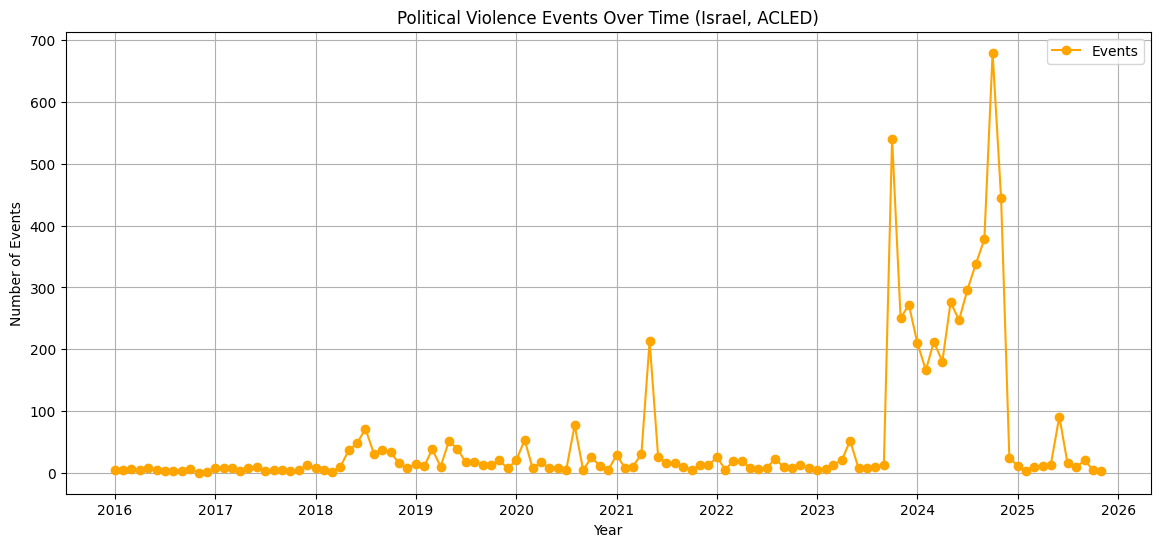

In [33]:
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["Events"], marker="o", color="orange", label="Events")
plt.title("Political Violence Events Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.legend()
plt.show()


### 🟠 Spike - Early 2021

- You’ll see a large jump roughly in the middle of 2021.
- This corresponds to a period of heightened violence inside Israel: a mix of major cross-border incidents, rocket fire, and internal clashes.
- For example, in May 2021, there was the conflict in Gaza which overlapped with Israeli territory incidents (the so-called “11-day war”).
- So this spike reflects a temporary escalation of political-violence events for a short time, then it drops back down.

### 🟠 Spike - 2023-2024 surge
- The highest spike in your graph is around “2023-24”.
- This is the major escalation from the October 7, 2023 attack by Hamas and its aftermath, which triggered many events inside Israel territory: cross-border attacks, retaliations, security operations, demonstrations and more.
- That surge pushed the events count far above typical levels — hence the big peak.


### Civilian Targeting Events Over Time (Israel, ACLED)
Shows months when civilians in Israel were directly targeted.

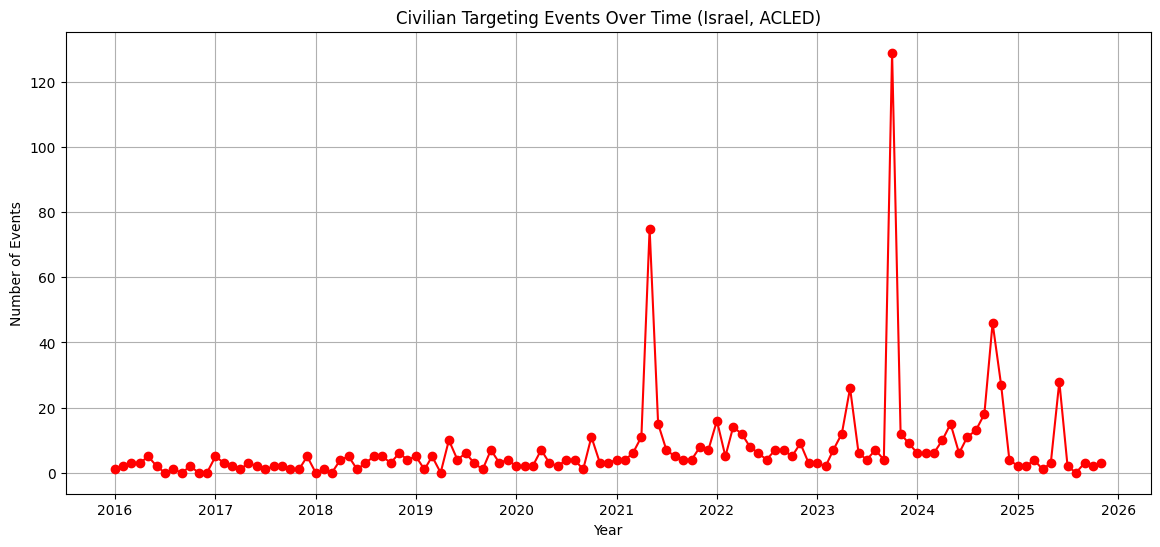

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_civ["date"], df_civ["Events"], marker="o", color="red")
plt.title("Civilian Targeting Events Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


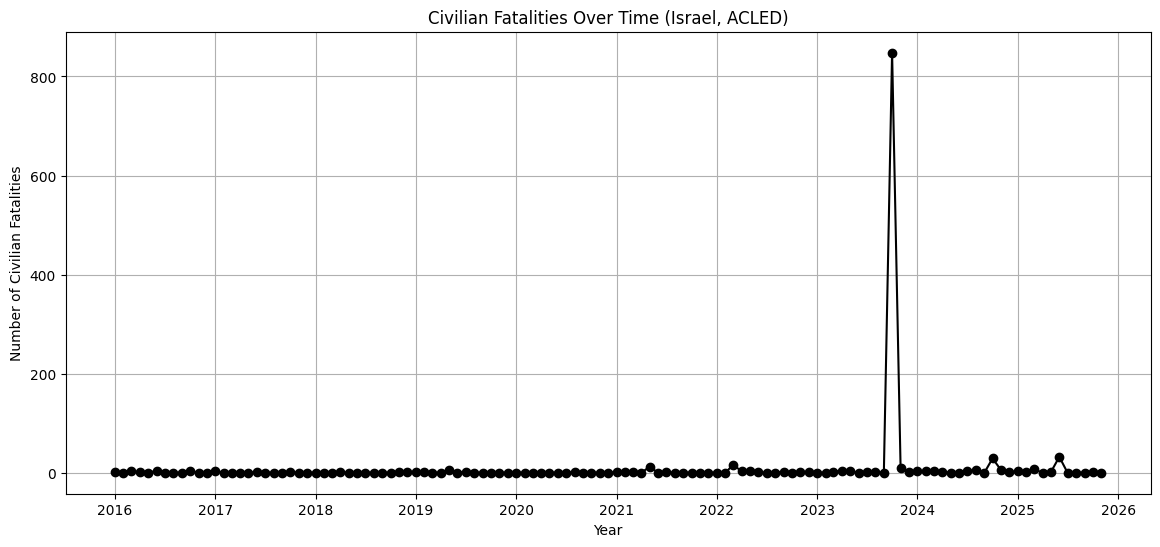

In [56]:
plt.figure(figsize=(14,6))
plt.plot(df_civ["date"], df_civ["Fatalities"], marker="o", color="black")
plt.title("Civilian Fatalities Over Time (Israel, ACLED)")
plt.xlabel("Year")
plt.ylabel("Number of Civilian Fatalities")
plt.grid(True)
plt.show()


In [57]:
df_civ.nlargest(5, "Fatalities")[["date", "Fatalities", "Events"]]


,date,Fatalities,Events
93,2023-10-01,848,129
113,2025-06-01,32,28
105,2024-10-01,29,46
74,2022-03-01,16,14
64,2021-05-01,12,75


In [58]:
df_civ.nlargest(5, "Events")[["date", "Events", "Fatalities"]]


,date,Events,Fatalities
93,2023-10-01,129,848
64,2021-05-01,75,12
105,2024-10-01,46,29
113,2025-06-01,28,32
106,2024-11-01,27,5


### 6-Month Rolling Average – Civilian Targeting Events

This line shows the average number of civilian-targeting events over the last 6 months. It smooths out the month-to-month spikes so the long-term trend becomes clearer — whether civilian-directed violence is increasing, decreasing, or staying stable.

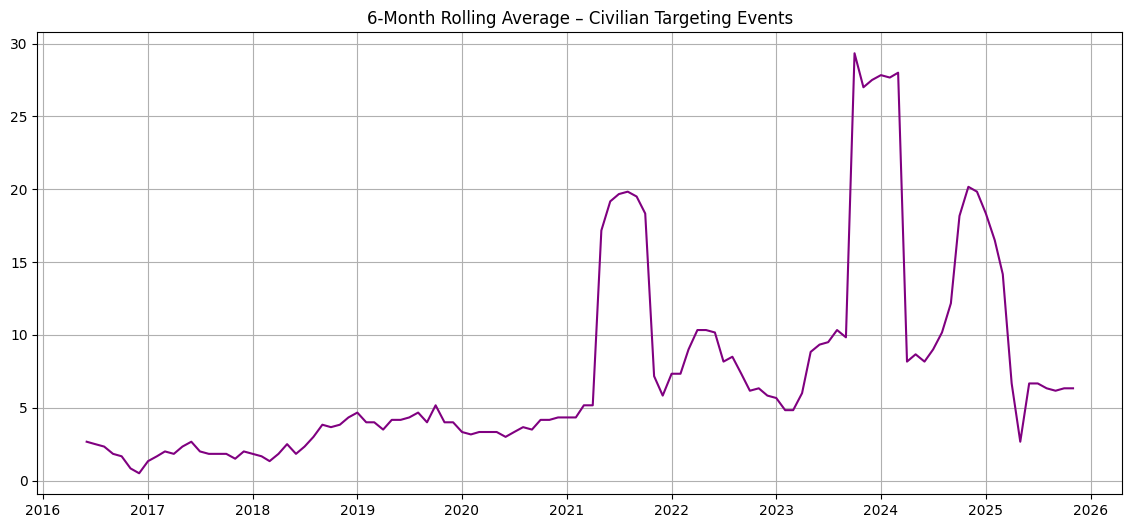

In [59]:
df_civ["events_rolling"] = df_civ["Events"].rolling(window=6).mean()

plt.figure(figsize=(14,6))
plt.plot(df_civ["date"], df_civ["events_rolling"], color="purple")
plt.title("6-Month Rolling Average – Civilian Targeting Events")
plt.grid(True)
plt.show()
